# Week 07 Exercises 

### 7.1 Calculating the Normalized Difference Index
From [https://www.usgs.gov/landsat-missions/landsat-normalized-difference-vegetation-index](https://www.usgs.gov/landsat-missions/landsat-normalized-difference-vegetation-index)... the Normalized Difference Vegetation Index (NDVI) is used to quantify vegetation greenness and is useful in understanding vegetation density and assessing changes in plant health. NDVI is calculated as a ratio between the red (R) and near infrared (NIR) values in traditional fashion: 

(NIR - R) / (NIR + R)

NDVI always ranges from -1 to +1. But there isn’t a distinct boundary for each type of land cover.For example, when you have negative values, it’s highly likely that it’s water. On the other hand, if you have an NDVI value close to +1, there’s a high possibility that it’s dense green leaves. But when NDVI is close to zero, there are likely no green leaves and it could even be an urbanized area.

For this first exercise you will calculate NDVI over the LMU campus.

1. Load both red (``` 'data/2023-02-22-sentinel-2-red-band.tiff' ```) and NIR (``` 'data/2023-02-22-sentinel-2-NIR-band.tiff' ```) bands from images taken from Sentinel-2 satellite over the LMU campus on February 22, 2023. Make sure when loading to use ```masked=True ```. Why do we want to do this? Check to see if the bounds, resolution and CRS are the same for both datasets. 

2. Calculate the NDVI. Export and save to a file as ``` 'data/2023-02-22-sentinel-2-NDVI.tiff' ```

3. Plot the NDVI data using the colormap ```RdYlGn```. Write 1-2 sentences describing patterns you notice.

4. Create a histogram with the custom bins: ```  bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1] ```. Write 1-2 sentences explaining patterns you notice. Lastly, print the max and min values. 

Part 1

In [163]:
import os
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import rioxarray as rxr
import xarray as xr
from shapely.geometry import mapping

#import seaborn as sns
#sns.set(font_scale=1.5, style="white")


In [164]:
redband = rxr.open_rasterio('data/2023-02-22-sentinel-2-red-band.tiff', masked=True).squeeze()
redband

<xarray.DataArray (y: 140, x: 159)>
[22260 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 -118.4 -118.4 -118.4 ... -118.4 -118.4 -118.4
  * y            (y) float64 33.98 33.97 33.97 33.97 ... 33.96 33.96 33.96 33.96
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    scale_factor:            1.0
    add_offset:              0.0

In [165]:
nirband = rxr.open_rasterio('data/2023-02-22-sentinel-2-NIR-band.tiff', masked=True).squeeze()
nirband

<xarray.DataArray (y: 140, x: 159)>
[22260 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 -118.4 -118.4 -118.4 ... -118.4 -118.4 -118.4
  * y            (y) float64 33.98 33.97 33.97 33.97 ... 33.96 33.96 33.96 33.96
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    scale_factor:            1.0
    add_offset:              0.0

In [166]:
# Checking bounds / spatial extent for both datasets

print("the bounds for redband is:" , redband.rio.bounds())
print("the bounds for nirband is:" , nirband.rio.bounds())

the bounds for redband is: (-118.42786815308502, 33.9646462468473, -118.41357734345368, 33.975110013826104)
the bounds for nirband is: (-118.42786815308502, 33.9646462468473, -118.41357734345368, 33.975110013826104)


In [167]:
# Checking resolution type for both datasets

print("the resolution for redband is:" , redband.rio.resolution())
print("the resolution for nirband is:" , nirband.rio.resolution())

the resolution for redband is: (8.987930585753243e-05, -7.474119270572796e-05)
the resolution for nirband is: (8.987930585753243e-05, -7.474119270572796e-05)


In [168]:
# Checking CRS type for both datasets

print("the CRS type for redband is:" , redband.rio.crs)
print("the CRS type for nirband is:" , nirband.rio.crs)

the CRS type for redband is: EPSG:4326
the CRS type for nirband is: EPSG:4326


NOTE - bounds, resolution, and CRS type are all the same for both datasets.

Part 2

In [169]:
# calculate NDVI
# NDVI = (NIR - Red) / (NIR + Red)

In [170]:
ndvi = (nirband - redband) / (nirband + redband)

In [171]:
#exporting and saving the new file

ndvi.rio.to_raster('data/2023-02-22-sentinel-2-NDVI.tiff')

Part 3

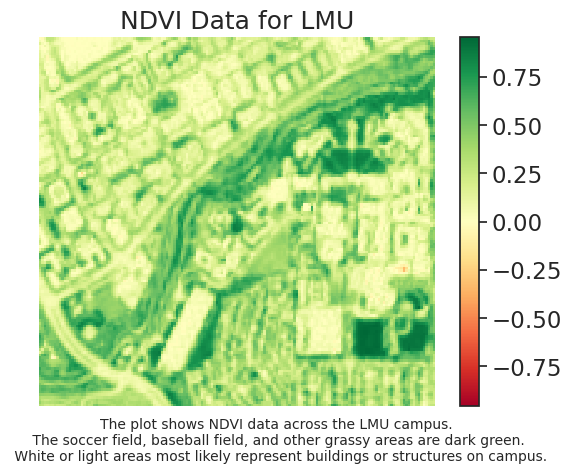

In [172]:
#plotting the NDVI data

f, ax = plt.subplots()
#f, ax = plt.subplots(figsize=(12,5)) << set a custom figure size

ndvi.plot(cmap="RdYlGn",
                 ax=ax)
ax.set_title("NDVI Data for LMU")
ax.set_axis_off()

#adding a caption to the bottom of the plot
txt="The plot shows NDVI data across the LMU campus. \n The soccer field, baseball field, and other grassy areas are dark green. \n White or light areas most likely represent buildings or structures on campus."
plt.figtext(0.5, 0.001, txt, wrap=True, horizontalalignment='center', fontsize=10)

plt.show()

Part 4

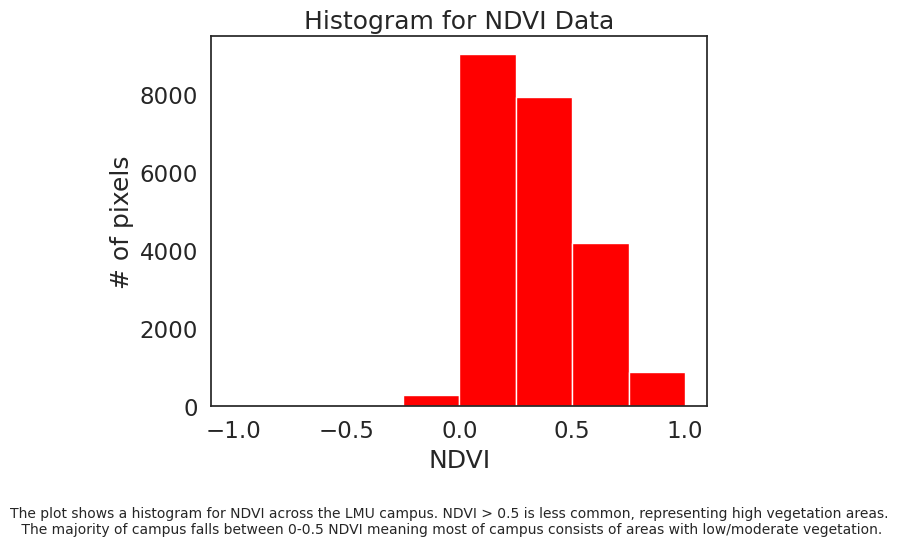

In [173]:
# Histogram with custom bins

f, ax = plt.subplots()
ndvi.plot.hist(color="red",
              bins = [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])

ax.set(title="Histogram for NDVI Data",
       xlabel="NDVI",
       ylabel="# of pixels")

#adding a caption to the bottom of the plot
txt="The plot shows a histogram for NDVI across the LMU campus. NDVI > 0.5 is less common, representing high vegetation areas. \n The majority of campus falls between 0-0.5 NDVI meaning most of campus consists of areas with low/moderate vegetation. "
plt.figtext(0.5, -0.15, txt, wrap=True, horizontalalignment='center', fontsize=10)

plt.show()

### 7.2  Manually Reclassify NDVI Data
Buildling on 7.1, let's now reclassify the NDVI data to more meaningful symbologies. 

1. Use the following breaks to reclassify the NDVI data:
- <0: water 
- 0 to 0.2: urban/barren
- 0.2 to 0.5: low vegetation
- $\gt$ 0.5: high vegetation

Note that you **do not** have to do any additional masking as your NoData mask already occured when loading in the data. 

2. Plot the data using the following parameters:
- ```colors = ['blue', 'beige', 'green', 'darkgreen']```
- ```class_bins = [0.5, 1.5, 2.5, 3.5, 4.5]```

Write a few sentences of what you observe. Where does this classification scheme do well? Where does it not do well? Think of what you see walking around campus and how it compares to the map you generated. 

3. Create a histogram of the classified NDVI data. Give rough approximations of the percentages of each cateogry (i.e. ~20% water, ~40% barren/urban land etc.)

Part 1

In [231]:
from matplotlib.colors import ListedColormap, BoundaryNorm

In [232]:
#reclassifying the bins with new breaks:

# <0: water
# 0 to 0.2: urban/barren
# 0.2 to 0.5: low vegetation
# >0.5: high vegetation

class_bins = [-np.inf, 0, 0.2, 0.5, np.inf]

In [233]:
colors = ['blue', 'beige', 'green', 'darkgreen']
ndvi_notclassified = rxr.open_rasterio('data/2023-02-22-sentinel-2-NDVI.tiff').squeeze()
ndvi_classified = xr.apply_ufunc(np.digitize,
                                 ndvi_notclassified,
                                 class_bins)

In [238]:
#checking the max/min NDVI values

ndvi_max = np.nanmax(ndvi_notclassified)
ndvi_min = np.nanmin(ndvi_notclassified)

print('NDVI max:', ndvi_max)
print('NDVI min:', ndvi_min)

NDVI max: 0.95758915
NDVI min: -0.3420191


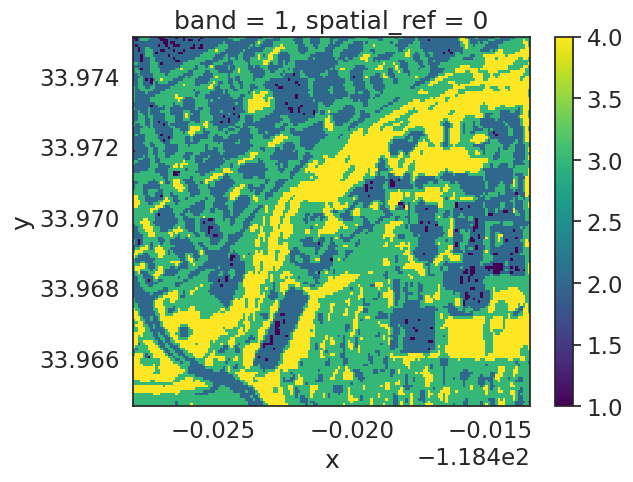

In [239]:
im = ndvi_classified.plot.imshow()

Part 2

In [240]:
colors = ['blue', 'beige', 'green', 'darkgreen']
class_bins_new = [0.5, 1.5, 2.5, 3.5, 4.5]
cmap = ListedColormap(colors)
norm = BoundaryNorm(class_bins_new,
                    len(colors))

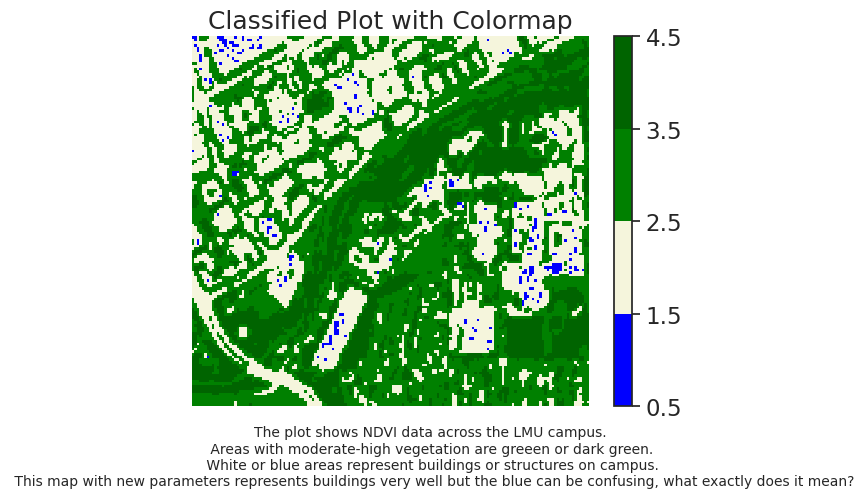

In [261]:
#New Plot with Classified Bins and Custom Colors

f, ax = plt.subplots()

ndvi_classified.plot.imshow(cmap = cmap,
                       norm = norm)
ax.set_title("Classified Plot with Colormap")
ax.set_axis_off()

#adding a caption to the bottom of the plot
txt="The plot shows NDVI data across the LMU campus. \n Areas with moderate-high vegetation are greeen or dark green. \n White or blue areas represent buildings or structures on campus. \n This map with new parameters represents buildings very well but the blue can be confusing, what exactly does it mean?"
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)

plt.show()

Part 3

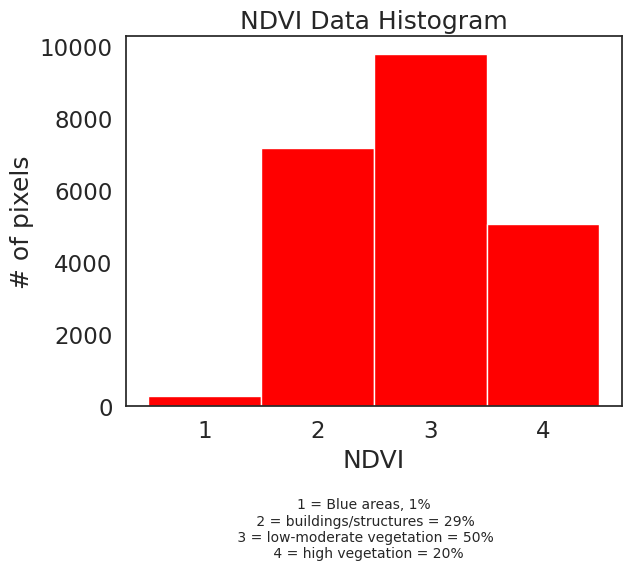

In [267]:
#Histogram of the classified NDVI data

f, ax = plt.subplots()
ndvi_classified.plot.hist(color="red",
              bins = [0.5, 1.5, 2.5, 3.5, 4.5])

ax.set(title="NDVI Data Histogram",
       xlabel="NDVI",
       ylabel="# of pixels")

#adding a caption to the bottom of the plot
txt="1 = Blue areas, 1% \n 2 = buildings/structures = 29% \n 3 = low-moderate vegetation = 50% \n 4 = high vegetation = 20%"
plt.figtext(0.5, -0.2, txt, wrap=True, horizontalalignment='center', fontsize=10)

plt.show()